DATA LOADING AND INSPECTION
---------------

In [1]:
#Importing libraries

#Packages for numeric
import pandas as pd
import numpy as np

#Packages for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px

# Modeling
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold, KFold
from imblearn.over_sampling import SMOTE,SMOTENC
from sklearn.metrics import f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,classification_report, accuracy_score,log_loss# performance metrics
from scipy import stats
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.feature_selection import RFE
from sklearn.inspection import permutation_importance

#Classifier module
from sklearn.ensemble import RandomForestClassifier

# Filtering future warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# # Load the data.
telecom = pd.read_csv('tele-churn.csv')

Data Preprocessing
---------
Encoding
----------

In [3]:
# Removing the phone number and state column
df1 = telecom.drop(['phone number', 'state', 'area code'], axis=1)

# change categorical data into numerical data
df1['international plan'] = df1['international plan'].map({'no': 0, 'yes': 1})
df1['voice mail plan'] = df1['voice mail plan'].map({'no': 0, 'yes': 1})
df1['churn'] = df1['churn'].map({False : 0, True : 1})

FEATURES SCALING / STANDARDIZATION
------------

In [4]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Define function for scaling a column
def scaling(column):
    return scaler.fit_transform(df1[[column]])

# Iterate through numerical columns and scale them
for column in df1.select_dtypes(include=[np.number]).columns:
    df1[[column]] = scaling(column)

In [5]:
# Creating a Test and Train Dataset
y = df1['churn']
X = df1.drop(['churn'], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state=42)

# Check the shapes of the split dataprint("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)
print("Train set size:", y_train.shape)
print("Test set size:", y_test.shape)

Test set size: (600, 17)
Train set size: (2733,)
Test set size: (600,)


SMOTE
-------

In [6]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
# Resample the training data

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the shape of the resampled data
print("Shape of X_train_resampled:", X_train_resampled.shape)
print("\nValue counts of y_train_resampled:\n", y_train_resampled.value_counts())

Shape of X_train_resampled: (4676, 17)

Value counts of y_train_resampled:
 churn
0.0    2338
1.0    2338
Name: count, dtype: int64


DATA MODELING
--------------
RandomForest Classifier
------------

In [7]:
#Initialize the Random Forest Classifier model
rf = RandomForestClassifier(random_state=42)

#Train the model
rf.fit(X_train_resampled, y_train_resampled)

#Make predictions
y_pred_rf = rf.predict(X_test)

#Evaluate the model
accuracy= accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
auc_roc = roc_auc_score(y_test, y_pred_rf)
print(f"RandomForest Classifier Accuracy: {accuracy :.4f}")
print(f"RandomForest Classifier Precision: {precision :.4f}")
print(f"RandomForest Classifier recall: {recall :.4f}")
print(f"RandomForest Classifier f1_score: {f1 :.4f}")
print(f"RandomForest Classifierr auc_roc: {auc_roc :.4f}")

print(classification_report(y_test, y_pred_rf))
print ("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))


print("Training Accuracy :", rf.score(X_train, y_train))
print("Training Resampled Accuracy :", rf.score(X_train_resampled, y_train_resampled))
print("Testing Accuracy :", rf.score(X_test, y_test))

RandomForest Classifier Accuracy: 0.9500
RandomForest Classifier Precision: 0.8295
RandomForest Classifier recall: 0.8295
RandomForest Classifier f1_score: 0.8295
RandomForest Classifierr auc_roc: 0.9001
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       512
         1.0       0.83      0.83      0.83        88

    accuracy                           0.95       600
   macro avg       0.90      0.90      0.90       600
weighted avg       0.95      0.95      0.95       600

Confusion Matrix:
 [[497  15]
 [ 15  73]]
ROC AUC Score: 0.9322065873579546
Training Accuracy : 1.0
Training Resampled Accuracy : 1.0
Testing Accuracy : 0.95


CONFUSION MATRIX 
-----------

In [8]:
y_pred_rf = rf.predict(X_test)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred_rf).ravel()

print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

True positives: 73
False positives: 15
True negatives: 497
False negatives: 15



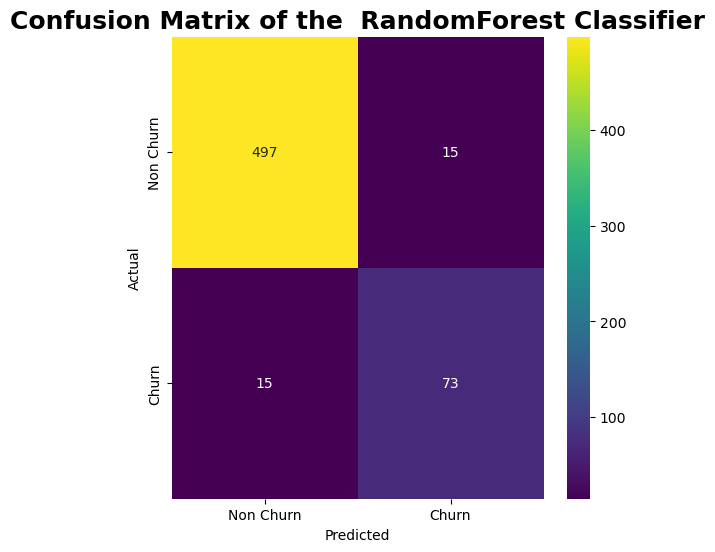

In [9]:
cm = confusion_matrix(y_test, y_pred_rf)

#Visualize the Matrix
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap='viridis', fmt='d',
            xticklabels=['Non Churn', 'Churn'],
            yticklabels=['Non Churn', 'Churn'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of the  RandomForest Classifier', size=18, color='black', fontweight= 'bold')
plt.show()

EVALUATION OF THE MACHINE LEARNING ALGORITHMS
-----------------

In [10]:
final_data = pd.DataFrame({"ALGORITHMS":["RandomForestClassifier"], 
                           "ACCURACY":[accuracy_score(y_test, y_pred_rf)*100],
                         "PRECISION":[precision_score(y_test, y_pred_rf)*100],
                          "RECALL":[recall_score(y_test, y_pred_rf)*100],
                          "F1_SCORE":[f1_score(y_test, y_pred_rf)*100], 
                            "ROC_AUC":[roc_auc_score(y_test, y_pred_rf)*100], 
                           
                        })

final_data

,ALGORITHMS,ACCURACY,PRECISION,RECALL,F1_SCORE,ROC_AUC
0,RandomForestClassifier,95.0,82.954545,82.954545,82.954545,90.012429


K_FOLD CROSS VALIDATION
--------------

ACCURACY
--------

In [11]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

rf_accuracies = cross_val_score(rf, X_train_resampled, y_train_resampled, cv=kf, scoring='accuracy')
print(rf_accuracies)
rf_avg_accuracy = np.mean(rf_accuracies)
rf_std_accuracy = np.std(rf_accuracies)
print(f"The std score of cross validation using RandomForest Classifier algorithm is {rf_std_accuracy * 100:.2f}%")
print(f"The mean score of cross validation using RandomForest Classifier algorithm is {rf_avg_accuracy * 100:.2f}%")

[0.97649573 0.94871795 0.94444444 0.95726496 0.96367521 0.95299145
 0.96788009 0.95931478 0.9614561  0.97002141]
The std score of cross validation using RandomForest Classifier algorithm is 0.94%
The mean score of cross validation using RandomForest Classifier algorithm is 96.02%


PRECISION
--------

In [12]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
rf_precision = cross_val_score(rf, X_train_resampled, y_train_resampled, cv=kf, scoring='precision')
print(rf_precision)
rf_avg_precision = np.mean(rf_precision)
rf_std_precision = np.std(rf_precision)
print(f"The std score of cross validation using RandomForest Classifier algorithm is {rf_std_precision * 100:.2f}%")
print(f"The mean score of cross validation using RandomForest Classifier algorithm is {rf_avg_precision * 100:.2f}%")

[0.99118943 0.96875    0.96428571 0.9612069  0.96969697 0.96902655
 0.96982759 0.96929825 0.95378151 0.98245614]
The std score of cross validation using RandomForest Classifier algorithm is 0.99%
The mean score of cross validation using RandomForest Classifier algorithm is 97.00%


RECALL
----

In [13]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
rf_recall = cross_val_score(rf, X_train_resampled, y_train_resampled, cv=kf, scoring='recall')
print(rf_recall)
rf_avg_recall = np.mean(rf_recall)
rf_std_recall = np.std(rf_recall)
print(f"The std score of cross validation using RandomForest Classifier algorithm is {rf_std_recall * 100:.2f}%")
print(f"The mean score of cross validation using RandomForest Classifier algorithm is {rf_avg_recall * 100:.2f}%")

[0.96153846 0.92735043 0.92307692 0.95299145 0.95726496 0.93589744
 0.96566524 0.94849785 0.97008547 0.95726496]
The std score of cross validation using RandomForest Classifier algorithm is 1.53%
The mean score of cross validation using RandomForest Classifier algorithm is 95.00%


F1_SCORE
----

In [14]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
rf_f1 = cross_val_score(rf, X_train_resampled, y_train_resampled, cv=kf, scoring='f1')
print(rf_f1)
rf_avg_f1 = np.mean(rf_f1)
rf_std_f1 = np.std(rf_f1)
print(f"The std score of cross validation using RandomForest Classifier algorithm is {rf_std_f1 * 100:.2f}%")
print(f"The mean score of cross validation using RandomForest Classifier algorithm is {rf_avg_f1 * 100:.2f}%")

[0.97613883 0.94759825 0.94323144 0.95708155 0.96344086 0.95217391
 0.96774194 0.95878525 0.96186441 0.96969697]
The std score of cross validation using RandomForest Classifier algorithm is 0.97%
The mean score of cross validation using RandomForest Classifier algorithm is 95.98%


CHECKING IF IT IS OVERFITTING OR NOT
---------------

In [15]:
if rf_avg_accuracy > accuracy:
    print("Model generalizes well: Cross_validation accuracy is higher or close to test accuracy")
else:
    print("Model might be overfitting: Cross validation accuracy is lower than test accuracy")

Model generalizes well: Cross_validation accuracy is higher or close to test accuracy


In [16]:
if rf_avg_accuracy > precision:
    print("Model generalizes well: Cross_validation accuracy is higher or close to test precision")
else:
    print("Model might be overfitting: Cross validation accuracy is lower than test precision")

Model generalizes well: Cross_validation accuracy is higher or close to test precision


In [17]:
if rf_avg_accuracy > recall:
    print("Model generalizes well: Cross_validation accuracy is higher or close to test recall")
else:
    print("Model might be overfitting: Cross validation accuracy is lower than test recall")

Model generalizes well: Cross_validation accuracy is higher or close to test recall


In [18]:
if rf_avg_f1 > f1:
    print("Model generalizes well: Cross_validation accuracy is higher or close to test f1_score")
else:
    print("Model might be overfitting: Cross validation accuracy is lower than test f1_score")

Model generalizes well: Cross_validation accuracy is higher or close to test f1_score


Total KFold Validation
------------

In [19]:
final_kfold = pd.DataFrame({"ALGORITHMS":["RandomForest Classifier"], 
                           "ACCURACY":[rf_avg_accuracy * 100],
                         "PRECISION":[rf_avg_precision * 100],
                          "RECALL":[rf_avg_recall * 100],
                          "F1_SCORE":[rf_avg_f1 * 100],  
                           
                        })

final_kfold

,ALGORITHMS,ACCURACY,PRECISION,RECALL,F1_SCORE
0,RandomForest Classifier,96.022621,96.99519,94.996332,95.977534


FEATURE IMPORTANCE
------------

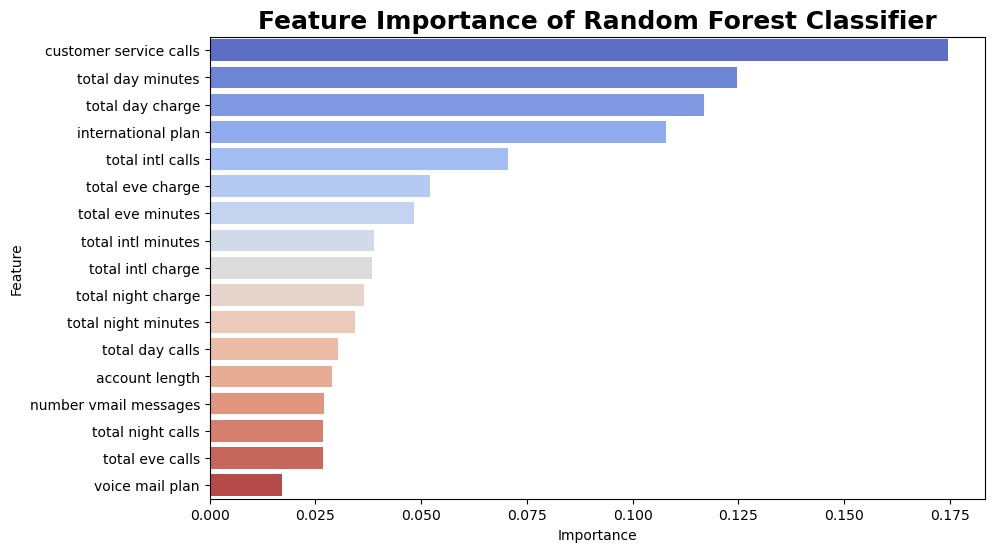

In [20]:
# Fit the best Random Forest model on the entire training data

rf.fit(X_train_resampled, y_train_resampled)

# Get feature importances
best_features = rf.feature_importances_

# Create a DataFrame to display feature names and their importances
feature_df = pd.DataFrame({'Feature': X_test.columns, 'Importance': best_features})

# Sort features by importance in descending order
feature_importance_rf = feature_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_rf, palette='coolwarm', hue='Feature', legend=False)
plt.title('Feature Importance of Random Forest Classifier', size=18, color='black', fontweight= 'bold')   
plt.show()

In [21]:
feature_importance_rf

,Feature,Importance
16,customer service calls,0.174499
4,total day minutes,0.124693
6,total day charge,0.116875
1,international plan,0.107993
14,total intl calls,0.070586
9,total eve charge,0.052027
7,total eve minutes,0.048303
13,total intl minutes,0.038820
15,total intl charge,0.038423
12,total night charge,0.036577


PERMUTATION FEATURE IMPORTANCE
--------------

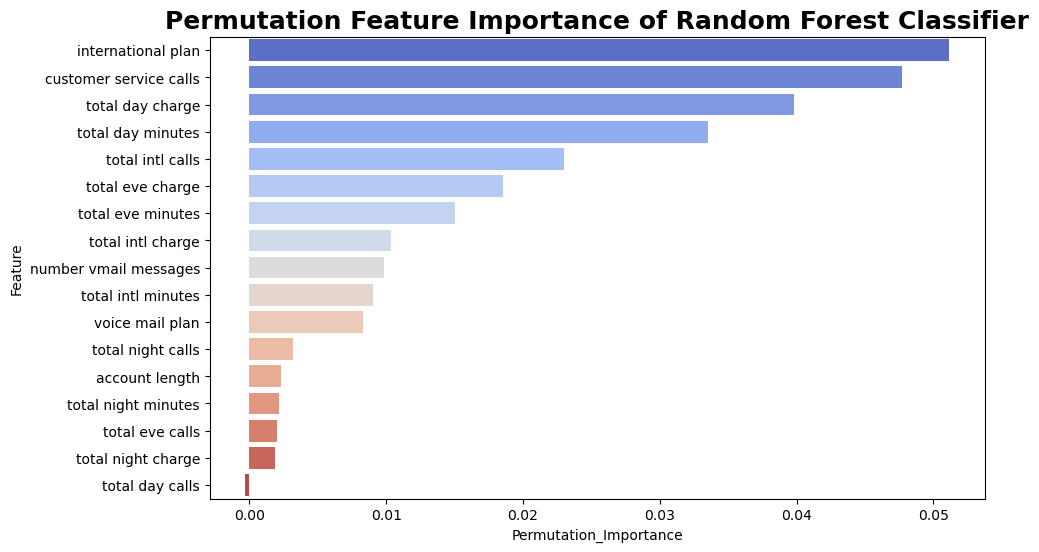

In [22]:
rf.fit(X_train_resampled, y_train_resampled)

#Calculate permutation feature importance
result = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42) 

# Get permutation feature importances
permutation_importances = result.importances_mean

# Create a DataFrame to display feature names and their importances
permutation_df = pd.DataFrame({'Feature': X_test.columns, 'Permutation_Importance': permutation_importances})

# Sort Permuation features by importance in descending order
permutation_importance_rf = permutation_df.sort_values(by='Permutation_Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Permutation_Importance', y='Feature', data=permutation_importance_rf, palette='coolwarm', hue='Feature', legend=False)
plt.title('Permutation Feature Importance of Random Forest Classifier', size=18, color='black', fontweight= 'bold')  
plt.show()

In [23]:
permutation_importance_rf

,Feature,Permutation_Importance
1,international plan,0.051167
16,customer service calls,0.047667
6,total day charge,0.039833
4,total day minutes,0.033500
14,total intl calls,0.023000
9,total eve charge,0.018500
7,total eve minutes,0.015000
15,total intl charge,0.010333
3,number vmail messages,0.009833
13,total intl minutes,0.009000


RECRUSIVE FEATURE ELIMINATION
--------------

In [24]:
rf.fit(X_train_resampled, y_train_resampled)
#Selected Features
importances = rf.feature_importances_
feature_importance = pd.DataFrame({'Feature': X_test.columns, 'Importance': importances})
selected_features = feature_importance[feature_importance['Importance'] > 0.05]
print("Selected Features:", selected_features)

Selected Features:                    Feature  Importance
1       international plan    0.107993
4        total day minutes    0.124693
6         total day charge    0.116875
9         total eve charge    0.052027
14        total intl calls    0.070586
16  customer service calls    0.174499


In [25]:
#Apply RFE
selector = RFE(rf, n_features_to_select=5)
selector = selector.fit(X_train_resampled, y_train_resampled)
#Selected Features
selected_features = X_test.columns[selector.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['total day minutes', 'total day charge', 'total eve minutes',
       'total intl calls', 'customer service calls'],
      dtype='object')
